# Homework 2: Kaggle Ames Housing Data Competition

I start out by importing the usual suspects, and I set the format to 3 decimal points.

In [179]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

I will need to calculate some statistics later, so I import them here.

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

I will also be using Matplotlib and Seaborn for graphics.

In [ ]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import matplotlib.pyplot as plt
%matplotlib inline

I want to see what I have in my directory and make sure that I have the data there.

In [181]:
os.listdir('C:\\Users\\iriley\\Documents\\byu_econ_applied_machine_learning\\homeworks')

['.ipynb_checkpoints',
 'data_description.txt',
 'Homework_1.ipynb',
 'Homework_2.ipynb',
 'Homework_2_v0.ipynb',
 'Homework_2_v1.ipynb',
 'Iris.csv',
 'ML Kaggle.ipynb',
 'Regularized Linear Models.ipynb',
 'sample_submission.csv',
 'Stacked Regressions.ipynb',
 'submission.csv',
 'test.csv',
 'train.csv',
 'vars.txt']

Now I import the data and make sure it looks OK.

In [182]:
train = pd.read_csv('C:\\Users\\iriley\\Documents\\byu_econ_applied_machine_learning\\homeworks\\train.csv')
test = pd.read_csv('C:\\Users\\iriley\\Documents\\byu_econ_applied_machine_learning\\homeworks\\test.csv')

In [183]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [184]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [315]:
print("The training set has the shape: {} ".format(train.shape))
print("The test set has the shape: {} ".format(test.shape))

The training set has the shape: (1458, 301) 
The test set has the shape: (1459, 301) 


I'll want the IDs later, but I don't need them for training.

In [185]:
train_ID = train['Id']
test_ID = test['Id']

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [ ]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

## Data Processing

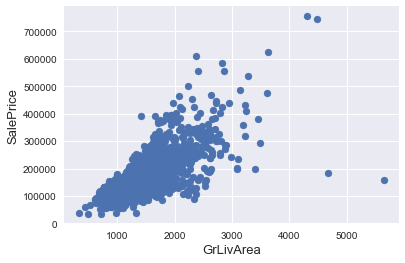

In [186]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

In [187]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Now to check the outline again:

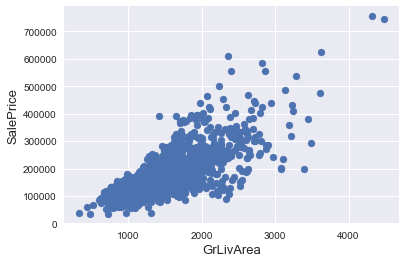

In [188]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Target Variable

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180932.92 and sigma = 79467.79



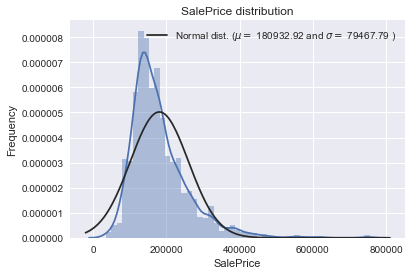

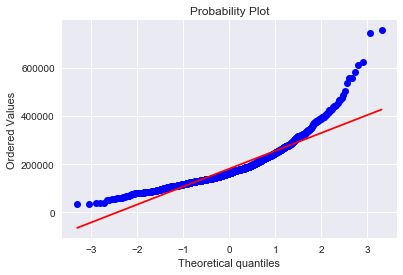

In [189]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

### Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



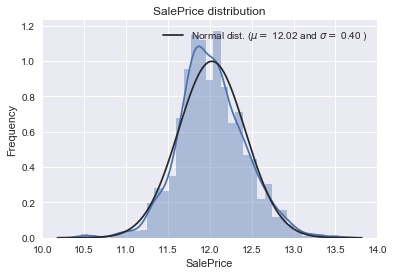

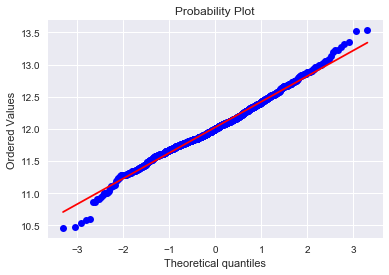

In [190]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

The skew seems now corrected and the data appears more normally distributed.

### Features engineering

let's first concatenate the train and test data in the same dataframe

In [191]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_ = pd.concat((train, test)).reset_index(drop=True)
all_.drop(['SalePrice'], axis=1, inplace=True)
print("all_ size is : {}".format(all_.shape))

all_ size is : (2917, 79)


### Missing Data

In [192]:
all__na = (all_.isnull().sum() / len(all_)) * 100
all__na = all__na.drop(all__na[all__na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all__na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


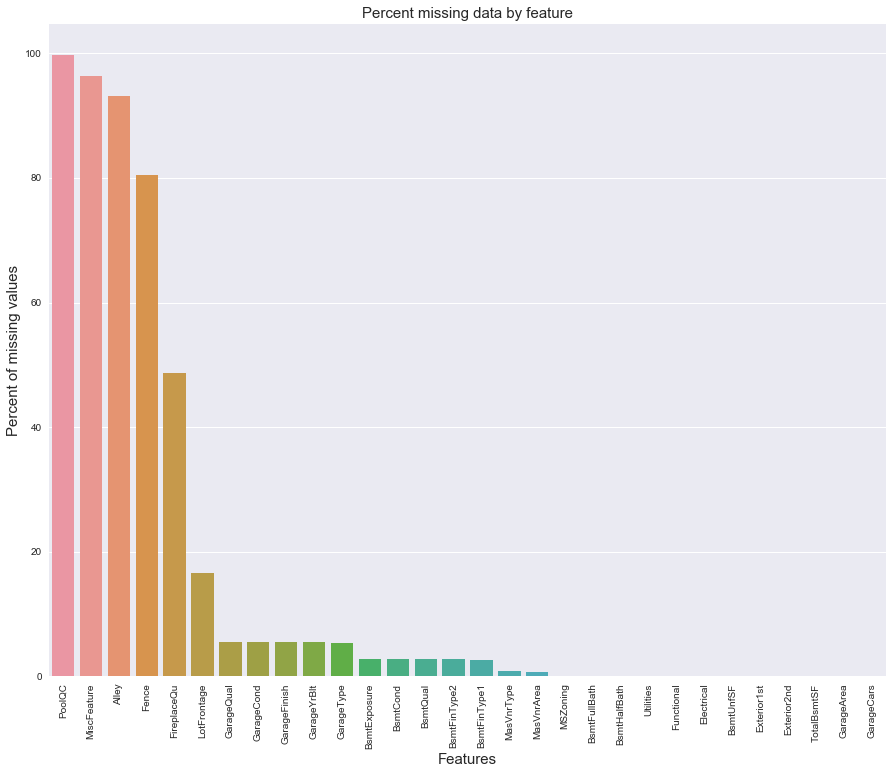

In [357]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all__na.index, y=all__na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Imputation of missing values

There isn't quite enough systmatic structure, so it's worth going through the variables one-by-one

* PoolQC - NA : "No Pool", so not surprising that most houses have no pool.

In [365]:
all_["PoolQC"] = all_["PoolQC"].fillna("None")

* MiscFeature: NA = "no misc feature", not a problem

In [366]:
all_["MiscFeature"] = all_["MiscFeature"].fillna("None")

* Alley: NA = "no alley access", not a problem

In [367]:
all_["Alley"] = all_["Alley"].fillna("None")

* Fence: NA = "no fence", not a problem


In [368]:
all_["Fence"] = all_["Fence"].fillna("None")

* FireplaceQu: NA means "no fireplace"


In [369]:
all_["FireplaceQu"] = all_["FireplaceQu"].fillna("None")

* LotFrontage: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.


In [370]:
all_["LotFrontage"] = all_.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

* GarageType, GarageFinish, GarageQual and GarageCond: Replacing missing data with None


In [371]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_[col] = all_[col].fillna('None')

* GarageYrBlt, GarageArea and GarageCars: Replacing missing data with 0 (no garage = no cars in such garage.)


In [372]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_[col] = all_[col].fillna(0)

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement


In [373]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_[col] = all_[col].fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.


In [374]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_[col] = all_[col].fillna('None')

* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.


In [375]:
all_["MasVnrType"] = all_["MasVnrType"].fillna("None")
all_["MasVnrArea"] = all_["MasVnrArea"].fillna(0)

* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'


In [376]:
all_['MSZoning'] = all_['MSZoning'].fillna(all_['MSZoning'].mode()[0])

* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 

In [377]:
all_ = all_.drop(['Utilities'], axis=1)

* 'NoSewa' is only in the training set, so it's essentially useless. We can get rid of it.


In [378]:
all_["Functional"] = all_["Functional"].fillna("Typ")

* Functional: NA = typical


In [379]:
all_['Electrical'] = all_['Electrical'].fillna(all_['Electrical'].mode()[0])

* Electrical has only one NA value. Since the mode is 'SBrkr', that can take the place of the missing value.

In [380]:
all_['KitchenQual'] = all_['KitchenQual'].fillna(all_['KitchenQual'].mode()[0])

* KitchenQual: one NA value, just like Electrical, we set the mode of 'TA' for the missing value in KitchenQual.


In [381]:
all_['Exterior1st'] = all_['Exterior1st'].fillna(all_['Exterior1st'].mode()[0])
all_['Exterior2nd'] = all_['Exterior2nd'].fillna(all_['Exterior2nd'].mode()[0])

* SaleType : Fill in again with most frequent which is "WD"

In [382]:
all_['SaleType'] = all_['SaleType'].fillna(all_['SaleType'].mode()[0])

* MSSubClass : Na most likely means No building class. We can replace missing values with None

In [383]:
all_['MSSubClass'] = all_['MSSubClass'].fillna("None")

Any more missing values?

In [384]:
all__na = (all_.isnull().sum() / len(all_)) * 100
all__na = all__na.drop(all__na[all__na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all__na})
missing_data.head()

,Missing Ratio


So no missing data are left.

### I still need to create dummies from categorical variables:

First with the type of dwelling:

In [385]:
all_['MSSubClass'] = all_['MSSubClass'].apply(str)

Then with the overall condition of the house.

In [386]:
all_['OverallCond'] = all_['OverallCond'].astype(str)

Finally, we take the year sold and make dummy variables.

In [387]:
all_['YrSold'] = all_['YrSold'].astype(str)
all_['MoSold'] = all_['MoSold'].astype(str)

### I still need to convert categorical data into numerical form, preserving order:

First, I list the categorical variables worth trying to turn into numerical variables.

In [388]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

I will want to make a list of just the factors with the same variables that I want to convert into numerical factors.

In [389]:
qual = cols[:10]
qual

('FireplaceQu',
 'BsmtQual',
 'BsmtCond',
 'GarageQual',
 'GarageCond',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'PoolQC',
 'KitchenQual')

What follows is the dictionary that I will want to use to transform them.

In [390]:
vals = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

I will replace Poor-Excellent with 1-5, since the categories are ordered and will likely still have meaning with numerical values.

In [391]:
for q in list(qual):
    for v in vals.keys():
        all_[q] = all_[q].replace(v,vals[v])

Now I want to check that the replacement worked.

In [392]:
for c in qual:
    print(all_[c].unique())

[ 0.  3.  4.  2.  5.  1.]
[ 4.  3.  5.  0.  2.]
[ 3.  4.  0.  2.  1.]
[ 3.  2.  4.  0.  5.  1.]
[ 3.  2.  0.  4.  1.  5.]
[4 3 5 2]
[3 4 2 1 5]
[5 4 3 2 1]
[0 5 2 4]
[ 4.  3.  5.  2.]


It worked! Since the transformation was successful, I can now create a composite of quality and interact it with size variables.

In [394]:
all_['Quality'] = 0
for q in qual:
    all_['Quality'] = all_['Quality']+all_[q]

I wanted to create a variable by adding up each of the quality variables, to gain a factor of the overal quality of the house, and the following is to check that it worked.

In [395]:
all_['Quality'].describe()

count   2917.000
mean      27.926
std        4.478
min        8.000
25%       25.000
50%       28.000
75%       31.000
max       41.000
Name: Quality, dtype: float64

Now I re-scale it before interacting it with the next factor I create.

In [396]:
all_['Quality'] = (all_['Quality']-all_['Quality'].min())/all_['Quality'].std()

In [397]:
all_['Quality'].describe()

count   2917.000
mean       4.449
std        1.000
min        0.000
25%        3.796
50%        4.466
75%        5.136
max        7.369
Name: Quality, dtype: float64

### Adding one more important feature

Here I add one more feature: total area.

In [402]:
all_['Footage'] = all_['TotalBsmtSF'] + all_['1stFlrSF'] + all_['2ndFlrSF']

### Creating an interaction

I want to make an interaction variable between the quality composite I made earlier and a size measure.

First, I make a composite of size measures.

In [403]:
all_['Footage'] = (all_['Footage']-all_['Footage'].min())/all_['Footage'].std()
all_['LotArea'] = (all_['LotArea']-all_['LotArea'].min())/all_['LotArea'].std()

In [404]:
all_['Size'] = 2*all_['Footage']+all_['LotArea']

In [405]:
all_['Size'].describe()

count   2917.000
mean       6.787
std        2.486
min        0.474
25%        5.175
50%        6.458
75%        8.050
max       37.232
Name: Size, dtype: float64

Now I can finally create the interaction term.

In [406]:
all_['SizeQual'] = all_['Size']*all_['Quality']
all_['SizeQual'] = np.log1p(all_['SizeQual'])

In [407]:
all_['SizeQual'].describe()

count   2917.000
mean       3.357
std        0.527
min        0.000
25%        3.050
50%        3.397
75%        3.709
max        5.243
Name: SizeQual, dtype: float64

From the summary statistics, it appears to be reasonable.

### Skewness.

No I just need to deal with the issue of skewness in the factors. First, I need to identify the factors that are numeric.

In [410]:
numeric_feats = all_.dtypes[all_.dtypes != "object"].index
skewed_feats = all_[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewness in the numerical features:")
skewness = pd.DataFrame({'Skewness' :skewed_feats})
skewness.head(10)

Skewness in the numerical features:


,Skewness
MiscVal,21.940
PoolQC,19.549
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


### Box Cox Transformation of (highly) skewed features

I can perform a Box Cox transformation to deal with the skewed data.

In [411]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed features to transform with the Box Cox method".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_[feat] = boxcox1p(all_[feat], lam)

There are 46 skewed features to transform with the Box Cox method


### Getting dummy categorical features

I also still need to get dummies from categorical features.

In [413]:
all_ = pd.get_dummies(all_)
print(all_.shape)

(2917, 301)


Now I split the data back into training and testing sets in preparation for training.

In [414]:
train = all_[:ntrain]
test = all_[ntrain:]

In [415]:
train.shape

(1458, 301)

In [416]:
test.shape

(1459, 301)

Everything seems to be OK.

### Modelling

Now I can start to actually create models, but first I need to import everything.

In [417]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

I decide to divide the training data up into 5 sections for cross-validation. This seems to be standard.

In [419]:
n_folds = 5

I also need to define a function in advance to calculate the RMSE of the model.

In [420]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base Models

#### LASSO Regression :

In [421]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#### Elastic Net Regression :

In [422]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Kernel Ridge Regression :

In [423]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression :

In [424]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### XGBoost :

In [425]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread = -1)

#### LightGBM :

In [426]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Scores for the basic models:

In [427]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0104 (0.0003)



In [430]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0104 (0.0003)



In [431]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0096 (0.0006)



In [432]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0092 (0.0005)



In [433]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0178 (0.0013)



In [434]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0091 (0.0004)



### Stacking models

First, I just average basic models to see whether that improves the model at all. Serigne on Kaggle shared a really nice class that does this, so I use his code here:

In [435]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

Now I can get the score for the averaged model:

In [436]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

In [437]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0092 (0.0003)



### Now I make a meta-model to see if I can bring down the score at all:

The basic idea here is to split the training data into two sets and then train on one, test on the other. Then I train a high-level learner using the predictions and the correct labels from the pseudo-test data.

In [438]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Once again, I use a class written by Kaggle user Serigne.

In [439]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0088 (0.0004)


So the score is even better this time.

Maybe I can get an even better score by adding XGBoost and LightGBM to the StackedRegressor.

First, the evaluation function:

In [440]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

Now, the final training and prediction with xgboost:

In [441]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.00564460590915


Add xgboost:

In [442]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0168008109673


And with lightgbm:

In [443]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.00559359710537


And now, finally, we get the rmse on the entire train data when we average across models:

In [444]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.00649574947943


The ensemble prediction is as follows:

In [445]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [446]:
ensemble

array([ 11.71124807,  12.01109544,  12.12054911, ...,  12.02389458,
        11.65816417,  12.24972978])

Now, I prepare the submission.

In [448]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)